# Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r"Amzn_Sale_ReportMX.csv", encoding='latin-1',low_memory=False)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.mx,Standard,T-shirt,S,On the Way,0,647.62,Ticul,Yucatán,25465,MX,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.mx,Standard,Shirt,3XL,Shipped,1,406.00,Nuevo Laredo,Tamaulipas,24511,MX,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.mx,Expedited,Shirt,XL,Shipped,1,329.00,Calimaya,México,21072,MX,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.mx,Standard,Blazzer,L,On the Way,0,753.33,Carmen,Campeche,29821,MX,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.mx,Expedited,Trousers,3XL,Shipped,1,574.00,Tlacoachistlahuaca,Guerrero,29436,MX,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.mx,Expedited,Shirt,XL,Shipped,1,517.00,San Ignacio Cohuirimpo,Sonora,80166,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.mx,Expedited,T-shirt,M,Shipped,1,999.00,San Pedro Atocpan,Ciudad de México,45645,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.mx,Expedited,Blazzer,XXL,Shipped,1,690.00,San Ignacio Cohuirimpo,Sonora,45905,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.mx,Expedited,T-shirt,XS,Shipped,1,1199.00,Oxkutzkab,Yucatán,80267,IN,False,NaN,NaN,NaN


In [3]:
df.shape

(128976, 20)

In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.mx,Standard,T-shirt,S,On the Way,0,647.62,Ticul,Yucatán,25465,MX,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.mx,Standard,Shirt,3XL,Shipped,1,406.00,Nuevo Laredo,Tamaulipas,24511,MX,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.mx,Expedited,Shirt,XL,Shipped,1,329.00,Calimaya,México,21072,MX,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.mx,Standard,Blazzer,L,On the Way,0,753.33,Carmen,Campeche,29821,MX,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.mx,Expedited,Trousers,3XL,Shipped,1,574.00,Tlacoachistlahuaca,Guerrero,29436,MX,False,NaN,NaN,NaN


In [5]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.mx,Expedited,Shirt,XL,Shipped,1,517.0,San Ignacio Cohuirimpo,Sonora,80166,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.mx,Expedited,T-shirt,M,Shipped,1,999.0,San Pedro Atocpan,Ciudad de México,45645,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.mx,Expedited,Blazzer,XXL,Shipped,1,690.0,San Ignacio Cohuirimpo,Sonora,45905,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.mx,Expedited,T-shirt,XS,Shipped,1,1199.0,Oxkutzkab,Yucatán,80267,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.mx,Expedited,T-shirt,S,Shipped,1,696.0,Tamuín,San Luis Potosí,12821,IN,False,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  Amount              121176 non-null  float64
 12  ship-city           128976 non-null  object 
 13  ship-state          128976 non-null  object 
 14  ship-postal-code    128976 non-null  int64  
 15  ship-country        128941 non-nul

In [7]:
df.drop(['New','PendingS'],axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  Amount              121176 non-null  float64
 12  ship-city           128976 non-null  object 
 13  ship-state          128976 non-null  object 
 14  ship-postal-code    128976 non-null  int64  
 15  ship-country        128941 non-nul

In [9]:
pd.isnull(df)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [10]:
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
Amount                 7800
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [11]:
df.shape

(128976, 18)

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(37514, 18)

In [14]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [15]:
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [16]:
df['ship-postal-code'].dtype

dtype('int32')

In [17]:
df.rename(columns={'Qty':'Quantity'},inplace=True)

In [18]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [19]:
df.describe()

,index,Quantity,Amount,ship-postal-code
count,37514.000000,37514.000000,37514.000000,37514.000000
mean,60953.809858,0.867383,646.553960,37032.455643
std,36844.853039,0.354160,279.952414,24334.533207
min,0.000000,0.000000,0.000000,10000.000000
25%,27235.250000,1.000000,458.000000,18608.000000
50%,63470.500000,1.000000,629.000000,27021.500000
75%,91790.750000,1.000000,771.000000,53952.500000
max,128891.000000,5.000000,5495.000000,95759.000000


In [20]:
df.describe(include='object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,91,11,1,1,1,8,11,3,928,32,2,1
top,171-5057375-2831560,04-25-22,Shipped - Delivered to Buyer,Merchant,Amazon.mx,Standard,T-shirt,M,Shipped,Nuevo Laredo,México,IN,Easy Ship
freq,12,697,28741,37514,37514,37514,14062,6806,31859,3025,3515,37138,37514


In [21]:
df[['Quantity','Amount']].describe()

,Quantity,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


# DATA ANALYSIS

In [22]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B', 'fulfilled-by'],
      dtype='object')

# size

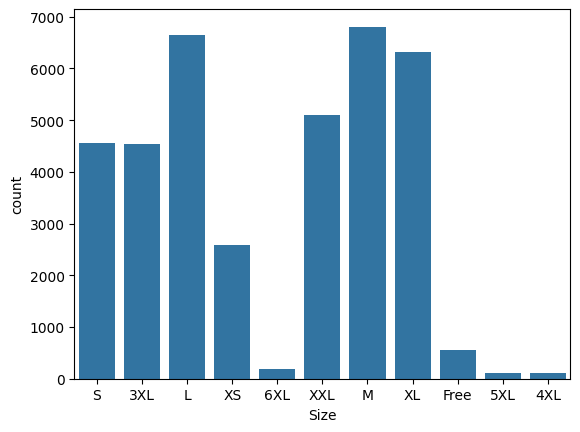

In [23]:
ax=sns.countplot(x='Size' , data=df)

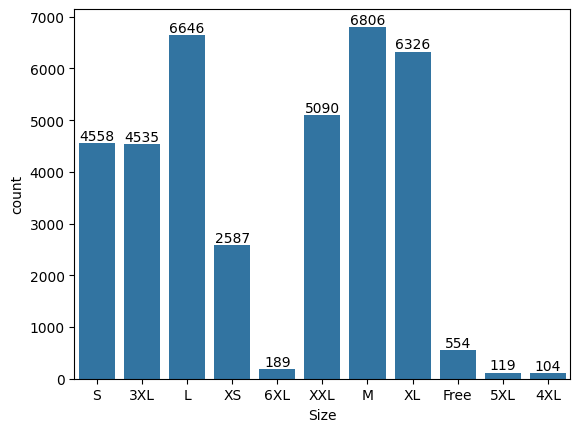

In [24]:
ax=sns.countplot(x='Size' , data=df)

for bars in ax.containers:
    ax.bar_label(bars)

# NOTE: From above graph you can see that most of the people buys M-SIZE.

## GROUP BY

### We will group the data based on multiple columns of the dataframe.

In [48]:
grouped_df = df.groupby(['Size'], as_index=False)['Quantity'].sum()
sorted_df = grouped_df.sort_values(by='Quantity', ascending=False)
separator_row = pd.DataFrame({'Size': ['-------'], 'Quantity': ['---------']}, index=[''])
total_row = pd.DataFrame({'Size': ['Total'], 'Quantity': [sorted_df['Quantity'].sum()]}, index=[''])
sorted_df = sorted_df.reset_index(drop=True)
sorted_df.index = sorted_df.index.map(str)  # Convertir los índices a cadenas
final_df = pd.concat([sorted_df, separator_row, total_row])
print(tabulate(final_df, headers='keys', tablefmt='psql', showindex=False))

+---------+------------+
| Size    | Quantity   |
|---------+------------|
| M       | 5905       |
| L       | 5795       |
| XL      | 5481       |
| XXL     | 4465       |
| 3XL     | 3972       |
| S       | 3896       |
| XS      | 2191       |
| Free    | 467        |
| 6XL     | 170        |
| 5XL     | 104        |
| 4XL     | 93         |
| ------- | --------   |
| Total   | 32539      |
+---------+------------+


<Axes: xlabel='Size', ylabel='Quantity'>

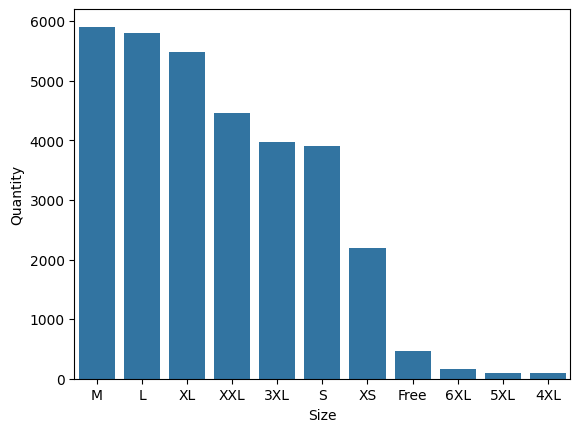

In [26]:
Sh= df.groupby(['Size'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
sns.barplot(x='Size', y='Quantity', data=Sh)

# Above graph you can see that most of the Quantity buys M-size in the sales.

### Courier Status

<Axes: xlabel='Courier Status', ylabel='count'>

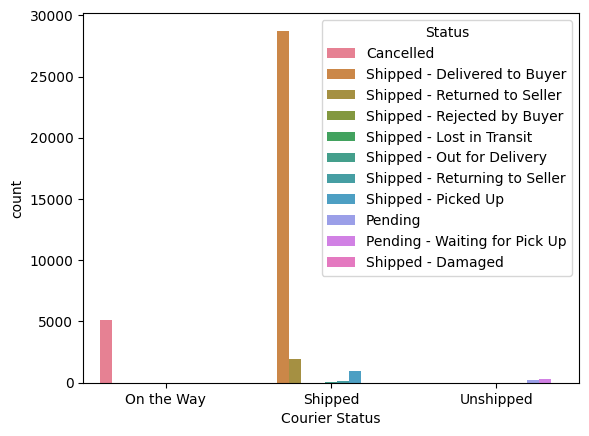

In [27]:
sns.countplot(data=df, x='Courier Status',hue='Status')

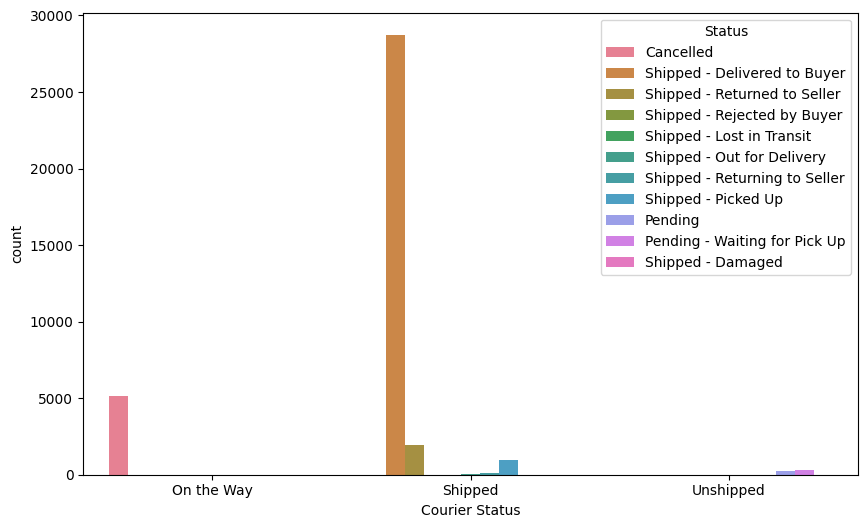

In [28]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Courier Status',hue='Status')
plt.show()

# Histogram

<Axes: >

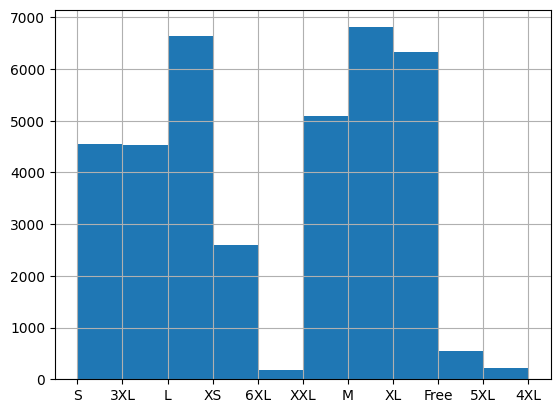

In [29]:
df['Size'].hist()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               37514 non-null  int64  
 1   Order ID            37514 non-null  object 
 2   Date                37514 non-null  object 
 3   Status              37514 non-null  object 
 4   Fulfilment          37514 non-null  object 
 5   Sales Channel       37514 non-null  object 
 6   ship-service-level  37514 non-null  object 
 7   Category            37514 non-null  object 
 8   Size                37514 non-null  object 
 9   Courier Status      37514 non-null  object 
 10  Quantity            37514 non-null  int64  
 11  Amount              37514 non-null  float64
 12  ship-city           37514 non-null  object 
 13  ship-state          37514 non-null  object 
 14  ship-postal-code    37514 non-null  int32  
 15  ship-country        37514 non-null  object 
 16  B2B     

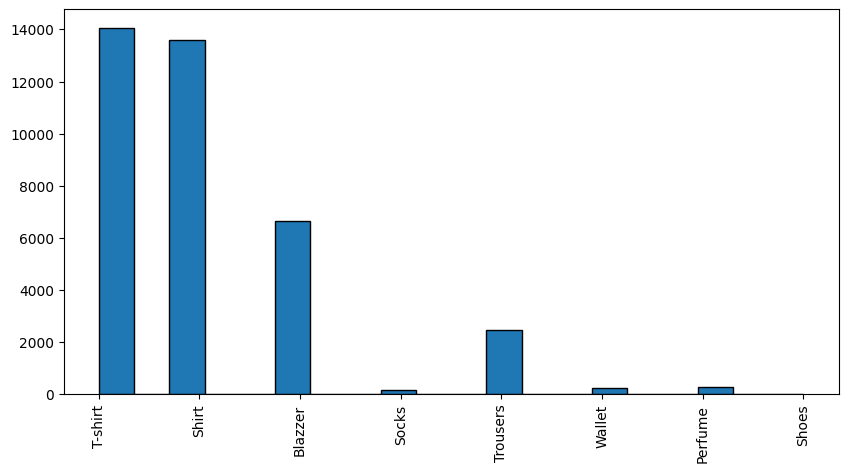

In [31]:
df['Category']=df['Category'].astype(str)
column_data=df['Category']
plt.figure(figsize=(10,5))
plt.hist(column_data, bins=20,edgecolor='black')
plt.xticks(rotation=90)
plt.show()

# Above graph you can see that most of the buyers are T-shirt.

# Pie chart

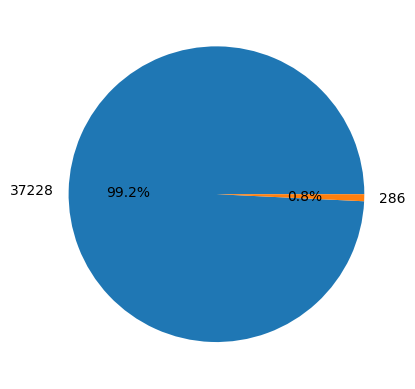

In [32]:
B2B_check=df['B2B'].value_counts()
plt.pie(B2B_check, labels=B2B_check,autopct='%1.1f%%')
plt.show()


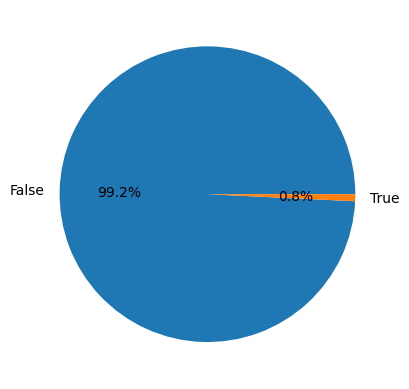

In [33]:
B2B_check=df['B2B'].value_counts()
plt.pie(B2B_check, labels=B2B_check.index,autopct='%1.1f%%')
plt.show()

# Above chart we can see that maximum 99.2% are retailers and 0.8% are B2B buyers.

# scatter plot

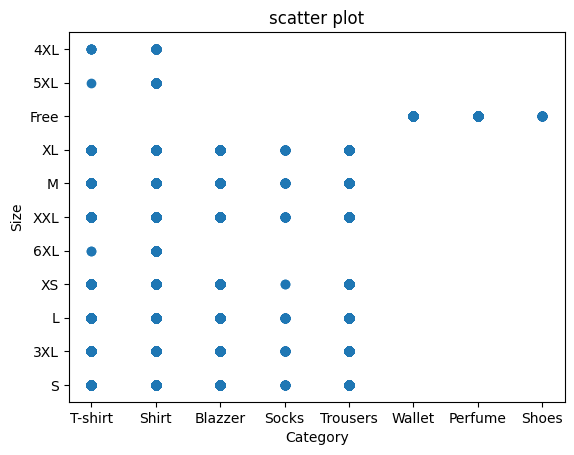

In [34]:
x=df['Category']
y=df['Size']

plt.scatter (x,y)
plt.xlabel ('Category')
plt.ylabel('Size')
plt.title('scatter plot')
plt.show()

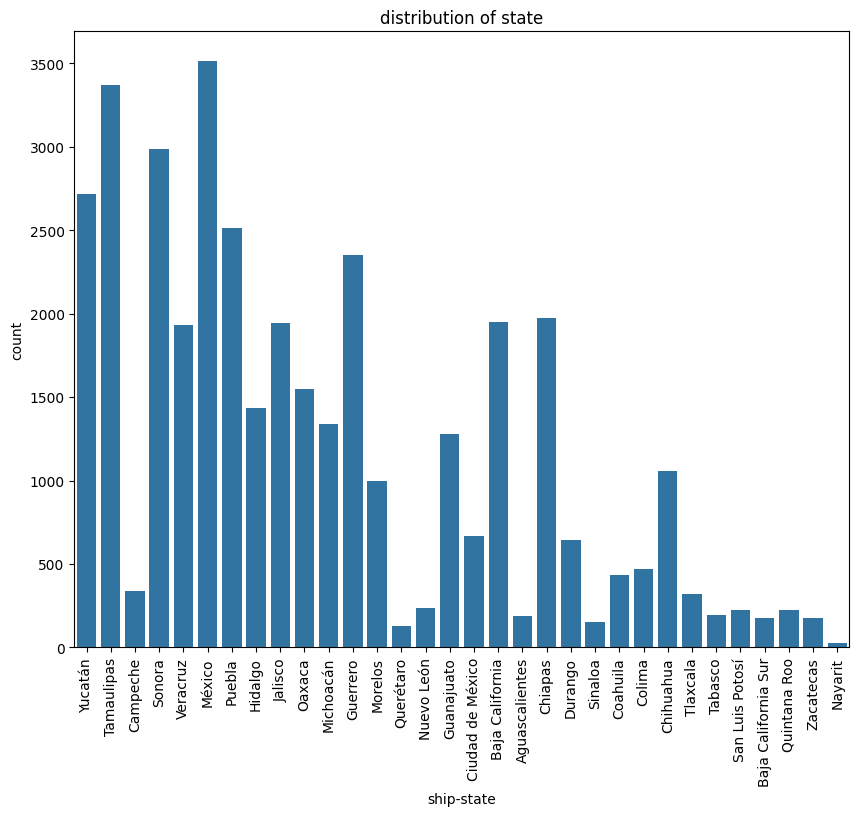

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('distribution of state')
plt.xticks(rotation=90)
plt.show()

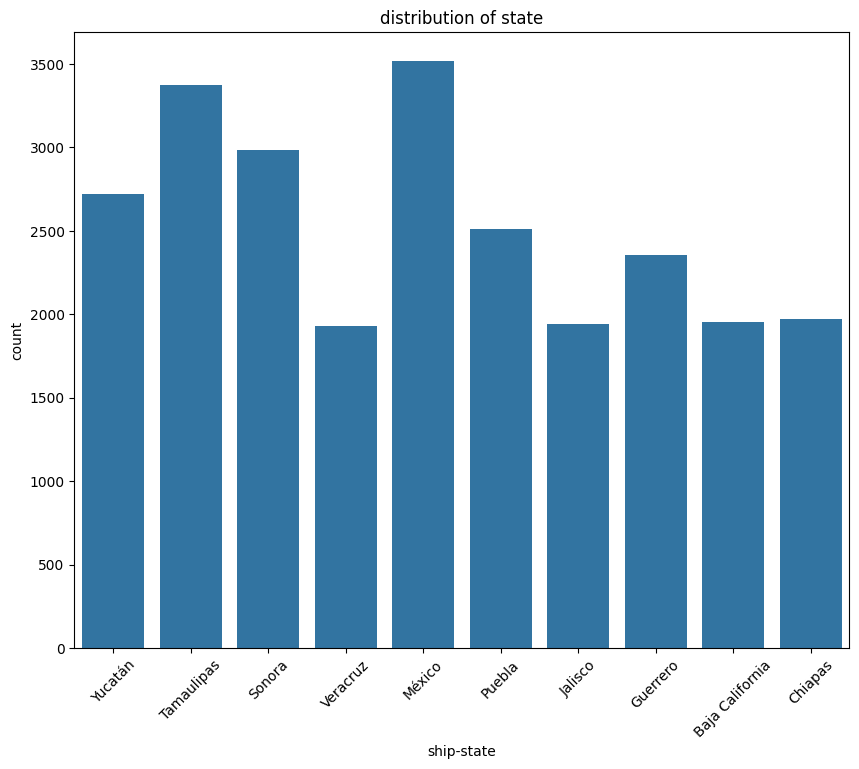

In [36]:
top_10_state=df['ship-state'].value_counts().head(10)

plt.figure(figsize=(10,8))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('distribution of state')
plt.xticks(rotation=45)
plt.show()

# In the previous graph, we can observe that the state of Mexico ranks first in sales, followed by Tamaulipas, being among the top ten markets with the highest number of sales.

# CONCLUSION:

# The data analysis reveals that the business has a significant base in EDOMEX, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-size as the preferred choice among buyers.